<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Departamento de Datos no Estructurados  </h1>


En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets** 

Una de las actividades tipicas en el departamento es el analisis, mineria de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjutará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraidos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisieramos conocer cual es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que esta en los textos, cabe destacar que este notebook esta diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un analisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por topicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*



---



## Mineria de Texto - Davivienda Tweets.

Con la finalidad de realizar el ejercicio de mineria y procesamiento de lenguaje natural puede utilizar cualquier libreria de python que facilite las siguientes tareas:

1. ***Analisis exploratorio*** y descriptivo de la base de datos davivienda_tweets.csv

2. ***Prepocesamiento del texto***:

    * Tokenizar: Separar el texto en párrafos, frases, etc..
    * Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres, etc. Utilice expresiones regulares para limpiar su texto.
    * Stopwords: estas palabras no tienen un significado por sí solas, sino que modifican o acompañan a otras.
    * Lematizar: cambio de tiempos verbales.
    * Estematizar o Stemmed: convertir palabras a sus raíces

3. ***WordClouds o Nubes de Palabras*** que permitan la visualización de datos  textuales significativos y conocer su relevancia en el texto.

4. ***Matriz termino-documento*** - Document-Term Matrix.

5. ***Histograma*** de palabras más importantes.

6. ***Latent Dirichlet Allocation*** - Modelo no supervisado de Tópicos.

7. ***Interpretación de Resultados y conclusiones generales.***


## 0. Librerías y Archivos

In [49]:
!pip install -r requirements.txt

In [2]:
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import nltk
import string
import re
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


import spacy
from spacy.cli import download

# Descargar el modelo de spaCy en español
download('es_core_news_sm')
nlp = spacy.load('es_core_news_sm')

pd.set_option('display.max_columns', None)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabrieva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabrieva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabrieva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gabrieva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd

# Leer el archivo CSV
filename = 'davivienda_tweets.csv'
data = pd.read_csv(filename)
data = data.drop(data.columns[0], axis=1)
data.Timestamp = pd.to_datetime(data.Timestamp)

C:\Users\gabrieva\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## 1. Análisis Exploratorio

En este apartado realice el análisis exploratorio y descriptivo de la base de datos davivienda_tweets.csv

In [4]:
data.head(2)

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Andrés Langebaek,@ALangebaek,2021-12-01 20:43:12+00:00,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,Plaza Futura,@plaza_futura,2021-12-01 21:18:10+00:00,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   UserScreenName  1807 non-null   object             
 1   UserName        1811 non-null   object             
 2   Timestamp       1811 non-null   datetime64[ns, UTC]
 3   Text            1811 non-null   object             
 4   Embedded_text   1811 non-null   object             
 5   Emojis          295 non-null    object             
 6   Comments        838 non-null    float64            
 7   Likes           247 non-null    object             
 8   Retweets        643 non-null    object             
 9   Image link      1811 non-null   object             
 10  Tweet URL       1811 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 155.8+ KB


In [6]:
def convert_mil(value):
    if pd.isna(value):
        return 0
    if isinstance(value, str):
        value = value.replace(',', '.')
        if ' mil' in value:
            value = float(value.replace(' mil', '')) * 1000
    return int(value)

In [7]:
# Aplicar la función a las columnas de Likes, Retweets y Comments

data['Likes'] = data['Likes'].apply(convert_mil)
data['Retweets'] = data['Retweets'].apply(convert_mil)
data['Comments'] = data['Comments'].apply(convert_mil)

data['Likes'] = data['Likes'].fillna(0).astype(int)
data['Retweets'] = data['Retweets'].fillna(0).astype(int)
data['Comments'] = data['Comments'].fillna(0).astype(int)

data.describe()

,Comments,Likes,Retweets
count,1811.000000,1811.000000,1811.000000
mean,0.699613,1.838763,3.790171
std,2.735140,41.178703,66.864662
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,87.000000,1500.000000,2500.000000


Se evidencia una dispersión alta entre los valores de comments, likes y retweets. La mayoría de los tweets de nuestra base no tienen una interacción significativa.

In [8]:
print(f'Número total de tweets: {len(data)}')
print()
print(f'Número de usuarios únicos: {data.UserName.nunique()}')
print()
print(f'Frecuencia de tweets por usuario:\n{data.UserName.value_counts().head(10)}')

Número total de tweets: 1811

Número de usuarios únicos: 1168

Frecuencia de tweets por usuario:
UserName
@Davivienda         245
@CNOGUERA20          41
@davicorredores      23
@Edimejia1979         9
@Juanma7725           8
@FabioFernandoH1      7
@DaviEscucha          7
@dataiFX              7
@Joacoro              6
@EnriqueDelgadoP      6
Name: count, dtype: int64


In [9]:
# Identificar los usuarios relacionados con el banco
bank_related_users = data[data['UserName'].str.lower().str.contains('dav')]['UserName'].unique()
print(bank_related_users)

# SE IDENTIFICAN LOS USUARIOS: 'Davivienda', 'DaviPlata', 'DaviEscucha', 'davicorredores'

['@David72995006' '@DaviPlata' '@DavidFlorezMP' '@davicorredores'
 '@Davivienda' '@Davidbeltran190' '@dougdav' '@DavidPaz_09' '@DaveMendezL'
 '@davila_davila49' '@davidfarmenta' '@brendavmorales' '@nandaruedavel'
 '@davosla' '@DaviEscucha' '@DavidOl48778231' '@davidapelaez'
 '@lahondadeDavid1' '@jdavidm81']


In [10]:
max_likes = data['Likes'].max()
max_retweets = data['Retweets'].max()
max_comments = data['Comments'].max()

tweet_max_likes = data[data['Likes'] == max_likes][['UserName', 'Embedded_text']].iloc[0]
tweet_max_retweets = data[data['Retweets'] == max_retweets][['UserName', 'Embedded_text']].iloc[0]
tweet_max_comments = data[data['Comments'] == max_comments][['UserName', 'Embedded_text']].iloc[0]

print("Tweet con más likes:\n")
print(f"Usuario: {tweet_max_likes['UserName']}")
print(f"Texto: {tweet_max_likes['Embedded_text']}")
print(f"Número de likes: {max_likes}\n")

print("Tweet con más retweets:\n")
print(f"Usuario: {tweet_max_retweets['UserName']}")
print(f"Texto: {tweet_max_retweets['Embedded_text']}")
print(f"Número de retweets: {max_retweets}\n")

print("Tweet con más comentarios:\n")
print(f"Usuario: {tweet_max_comments['UserName']}")
print(f"Texto: {tweet_max_comments['Embedded_text']}")
print(f"Número de comentarios: {max_comments}")

Tweet con más likes:

Usuario: @wilsonariasc
Texto: He conocido de primera mano un caso en el que funcionarios de 
@Davivienda
, con aparente falsificación de firmas, cambiaron cláusulas de un contrato de promesa de compraventa y se terminaron beneficiando de más de $1.000 millones de pesos. Hacen y desasen sin que nadie los vigile.
87
1,5 mil
2,5 mil
Número de likes: 1500

Tweet con más retweets:

Usuario: @wilsonariasc
Texto: He conocido de primera mano un caso en el que funcionarios de 
@Davivienda
, con aparente falsificación de firmas, cambiaron cláusulas de un contrato de promesa de compraventa y se terminaron beneficiando de más de $1.000 millones de pesos. Hacen y desasen sin que nadie los vigile.
87
1,5 mil
2,5 mil
Número de retweets: 2500

Tweet con más comentarios:

Usuario: @wilsonariasc
Texto: He conocido de primera mano un caso en el que funcionarios de 
@Davivienda
, con aparente falsificación de firmas, cambiaron cláusulas de un contrato de promesa de compraventa y se t

El tweet del usuario @wilsonariasc corresponde al que tiene más likes, comentarios y retweets.

## 2. Prepocesamiento de Texto

In [11]:
def clean_text(text):
    # Eliminar nombres de usuario
    # text = re.sub(r'@\w+', '', text)
    # Eliminar caracteres no deseados
    text = re.sub(r'[^A-Za-zÁÉÍÓÚáéíóúÑñÜü\s!?#@]', '', text)
    text = text.lower()
    text = text.strip()
    text = ' '.join(text.split())
    return text

In [12]:
data['Embedded_text_modified'] = data['Embedded_text'].apply(clean_text)

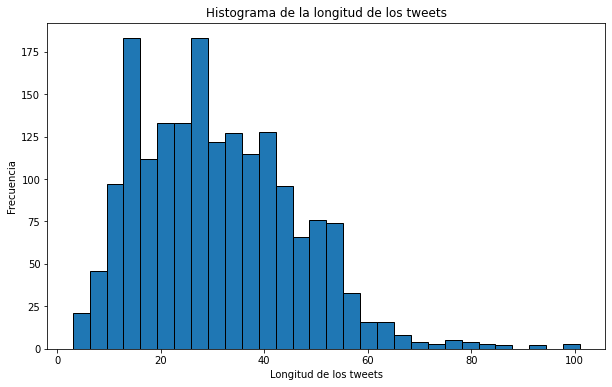

In [13]:
data['longitud_tweets'] = data['Embedded_text_modified'].apply(lambda x: len(nltk.word_tokenize(x)))

plt.figure(figsize=(10, 6))
plt.hist(data['longitud_tweets'], bins=30, edgecolor='black')
plt.title('Histograma de la longitud de los tweets')
plt.xlabel('Longitud de los tweets')
plt.ylabel('Frecuencia')
plt.show()

In [14]:
# Función para encontrar menciones en el texto y eliminar duplicados manteniendo el orden
def find_mentions(text):
    mentions = re.findall(r'@\w+', text)
    seen = set()
    unique_mentions = []
    for mention in mentions:
        if mention not in seen:
            unique_mentions.append(mention)
            seen.add(mention)
    return unique_mentions

# Crear una nueva columna con las menciones encontradas
data['Mentions'] = data['Embedded_text_modified'].apply(find_mentions)


In [15]:
# Crear una nueva columna con las menciones encontradas
data['Mentions'] = data['Embedded_text_modified'].apply(find_mentions)

# Filtrar las menciones para excluir el nombre de usuario del autor del tweet
data['Mentions'] = data.apply(lambda row: [mention for mention in row['Mentions'] if mention.lower() != row['UserName'].lower()], axis=1)

# Crear una nueva columna contando los usuarios mencionados por tweet
data['Mentions_Count'] = data['Mentions'].apply(len)


In [16]:
data.UserName = data.UserName.str.lower()

### ¿Qué porcentaje de los tweets realizados por las cuentas oficiales mencionan a otros usuarios?

In [17]:
# Lista de cuentas oficiales
official_accounts = ['@daviplata', '@davicorredores', '@davivienda', '@daviescucha']

# Filtrar los datos según los usuarios de interés
filtered_data = data[data['UserName'].isin(official_accounts)].copy()

# Crear una nueva columna con las menciones encontradas
filtered_data.loc[:, 'Mentions'] = filtered_data['Embedded_text_modified'].apply(find_mentions)

# Filtrar las menciones para excluir el nombre de usuario del autor del tweet
filtered_data.loc[:, 'Mentions'] = filtered_data.apply(lambda row: [mention for mention in row['Mentions'] if mention.lower() != row['UserName'].lower()], axis=1)

# Crear una nueva columna contando los usuarios mencionados por tweet
filtered_data.loc[:, 'Mentions_Count'] = filtered_data['Mentions'].apply(len)

# Identificar si las menciones son de usuarios no oficiales
filtered_data.loc[:, 'Responding_to_non_official'] = filtered_data['Mentions'].apply(lambda mentions: any(mention not in bank_related_users for mention in mentions))


In [18]:
# Contar el total de tweets y cuántos están respondiendo a otros usuarios
total_tweets = filtered_data.groupby('UserName').size().reset_index(name='Total_Tweets')
response_counts = filtered_data.groupby('UserName')['Responding_to_non_official'].sum().reset_index(name='Responding_Tweets')

# Unir los dos DataFrames
result = pd.merge(total_tweets, response_counts, on='UserName')

result

,UserName,Total_Tweets,Responding_Tweets
0,@davicorredores,23,6
1,@daviescucha,7,7
2,@daviplata,1,1
3,@davivienda,245,241


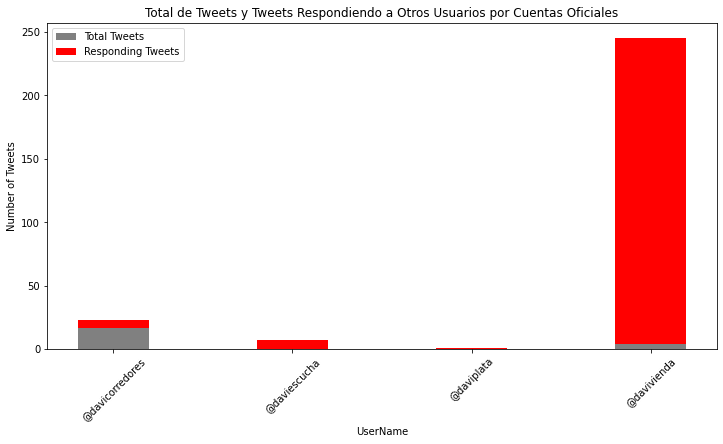

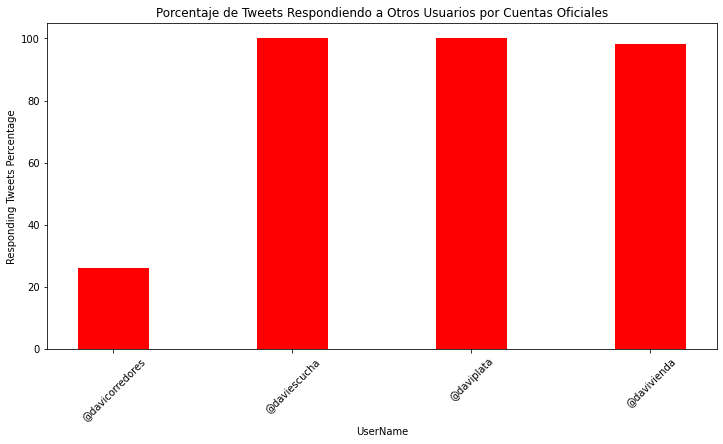

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular el porcentaje de tweets que están respondiendo a otros usuarios
result['Responding_Percentage'] = (result['Responding_Tweets'] / result['Total_Tweets']) * 100

# Gráfico de barras para el número total de tweets y tweets respondiendo a otros usuarios
plt.figure(figsize=(12, 6))

# Datos
usernames = result['UserName']
total_tweets = result['Total_Tweets']
responding_tweets = result['Responding_Tweets']

# Crear las barras
bar_width = 0.4
index = np.arange(len(usernames))

plt.bar(index, total_tweets, bar_width, label='Total Tweets', color='grey')
plt.bar(index, responding_tweets, bar_width, label='Responding Tweets', color='red', bottom=total_tweets-responding_tweets)

# Etiquetas y título
plt.xlabel('UserName')
plt.ylabel('Number of Tweets')
plt.title('Total de Tweets y Tweets Respondiendo a Otros Usuarios por Cuentas Oficiales')
plt.xticks(index, usernames, rotation=45)
plt.legend()

plt.show()

# Gráfico de barras para el porcentaje de tweets respondiendo a otros usuarios
plt.figure(figsize=(12, 6))

# Crear las barras
plt.bar(index, result['Responding_Percentage'], bar_width, color='red')

# Etiquetas y título
plt.xlabel('UserName')
plt.ylabel('Responding Tweets Percentage')
plt.title('Porcentaje de Tweets Respondiendo a Otros Usuarios por Cuentas Oficiales')
plt.xticks(index, usernames, rotation=45)

plt.show()

### Enriquecer la base de datos

Para las cuentas oficiales, en caso de ser una respuesta a otro usuario se pretende encontrar el tweet original por el cuál se generó esa respuesta.

1. Crear una lista de todas las menciones hechas por las cuentas oficiales, excluyendo las cuentas oficiales.
2. Filtrar los tweets de las cuentas oficiales que mencionan a usuarios no oficiales.
3. Utilizar la columna `Timestamp` para identificar el tweet al que la cuenta oficial está respondiendo.
4. Añadir una columna con el contenido del tweet original.

In [20]:
# Crear una lista de todas las menciones hechas por las cuentas oficiales, excluyendo las cuentas oficiales
official_mentions = filtered_data['Mentions'].explode().dropna().unique()
official_mentions = [mention for mention in official_mentions if mention.lower() not in official_accounts]

non_official_data = data[~data['UserName'].isin(official_accounts)].copy()
non_official_data['Mentions'] = non_official_data['Embedded_text_modified'].apply(find_mentions)
non_official_data['Mentioned_by_official'] = non_official_data['Mentions'].apply(lambda mentions: any(mention in official_mentions for mention in mentions))
official_responses = filtered_data[filtered_data['Responding_to_non_official']].copy()

# Identificar el tweet al que la cuenta oficial le está respondiendo
def find_original_tweet(row, non_official_data):
    mentions = row['Mentions']
    timestamp = row['Timestamp']
    for mention in mentions:
        original_tweet = non_official_data[(non_official_data['UserName'] == mention) & (non_official_data['Timestamp'] < timestamp)]
        if not original_tweet.empty:
            return original_tweet.iloc[0][['Timestamp', 'Embedded_text_modified']]
    return None

official_responses['Original_Tweet_Info'] = official_responses.apply(lambda row: find_original_tweet(row, non_official_data), axis=1)
official_responses_with_original = official_responses[official_responses['Original_Tweet_Info'].notnull()]

official_responses_with_original.loc[:, 'Original_Tweet_Timestamp'] = official_responses_with_original['Original_Tweet_Info'].apply(lambda x: x['Timestamp'])
official_responses_with_original.loc[:, 'Original_Tweet_Text'] = official_responses_with_original['Original_Tweet_Info'].apply(lambda x: x['Embedded_text_modified'])
official_responses_with_original = official_responses_with_original.drop(columns=['Original_Tweet_Info'])

C:\Users\gabrieva\AppData\Local\Temp\ipykernel_10036\3588971034.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  official_responses_with_original.loc[:, 'Original_Tweet_Timestamp'] = official_responses_with_original['Original_Tweet_Info'].apply(lambda x: x['Timestamp'])
C:\Users\gabrieva\AppData\Local\Temp\ipykernel_10036\3588971034.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  official_responses_with_original.loc[:, 'Original_Tweet_Text'] = official_responses_with_original['Original_Tweet_Info']

In [21]:
# Imprimir el número total de tweets y los tweets originales identificados
total_tweets = len(official_responses_with_original)
print(f'En total se encontraron 95 tweets en la base de datos. De estos, se identificaron {total_tweets} tweets originales a los que las cuentas oficiales están respondiendo.')
print()
# Imprimir los nombres de usuario únicos para los cuales se encontraron datos
unique_usernames = official_responses_with_original['UserName'].unique()
print('Usernames oficiales únicos para los cuales se encontraron datos:')
for username in unique_usernames:
    print(username)

En total se encontraron 95 tweets en la base de datos. De estos, se identificaron 95 tweets originales a los que las cuentas oficiales están respondiendo.

Usernames oficiales únicos para los cuales se encontraron datos:
@davivienda


In [22]:
# Ajustar la configuración de pandas para mostrar todo el texto
pd.set_option('display.max_colwidth', None)

In [23]:
data[data.UserName == '@deibyfandino'][['UserName','Timestamp', 'Embedded_text_modified']]

,UserName,Timestamp,Embedded_text_modified
230,@deibyfandino,2021-12-05 22:28:53+00:00,@davivienda que pésimo servicio el de los cajeros de davivienda los cajeros del minuto d dios quirigua y titán dañados imposible sacar plata


In [24]:
official_responses_with_original[['UserName','Timestamp', 'Embedded_text_modified']].head(1)

,UserName,Timestamp,Embedded_text_modified
242,@davivienda,2021-12-05 22:54:56+00:00,en respuesta a @deibyfandino buenas tardes sr deiby lamentamos este tipo de inconvenientes por favor escribanos a través de mensaje privado para validar su caso quedamos atentos


In [25]:
# Calcular el tiempo de respuesta entre el tweet original y el tweet de respuesta de la cuenta oficial
official_responses_with_original['Response_Time'] = official_responses_with_original['Timestamp'] - official_responses_with_original['Original_Tweet_Timestamp']
official_responses_with_original['Original_UserName'] = official_responses_with_original.apply(lambda row: non_official_data[non_official_data['Timestamp'] == row['Original_Tweet_Timestamp']]['UserName'].values[0], axis=1)
response_analysis = official_responses_with_original[['UserName', 'Original_UserName', 'Timestamp', 'Original_Tweet_Timestamp', 'Response_Time']]

### Interpretación del Análisis Estadístico del Tiempo de Respuesta
* La mayoría de los tiempos de respuesta son relativamente cortos, con un 75% de las respuestas realizadas en menos de 1 hora.
* Hay algunos tiempos de respuesta muy largos, lo que aumenta la media y la desviación estándar.

```python
response_time_stats = response_analysis['Response_Time'].describe()

<table>
    <tr>
        <th>Medida</th>
        <th>Valor</th>
    </tr>
    <tr>
        <td>Count</td>
        <td>95</td>
    </tr>
    <tr>
        <td>Mean</td>
        <td>1 days 08:40:42.389473684</td>
    </tr>
    <tr>
        <td>Std</td>
        <td>3 days 10:03:13.252818848</td>
    </tr>
    <tr>
        <td>Min</td>
        <td>0 days 00:00:36</td>
    </tr>
    <tr>
        <td>25%</td>
        <td>0 days 00:02:46</td>
    </tr>
    <tr>
        <td>50%</td>
        <td>0 days 00:07:46</td>
    </tr>
    <tr>
        <td>75%</td>
        <td>0 days 01:00:11.500000</td>
    </tr>
    <tr>
        <td>Max</td>
        <td>16 days 03:53:22</td>
    </tr>
</table>

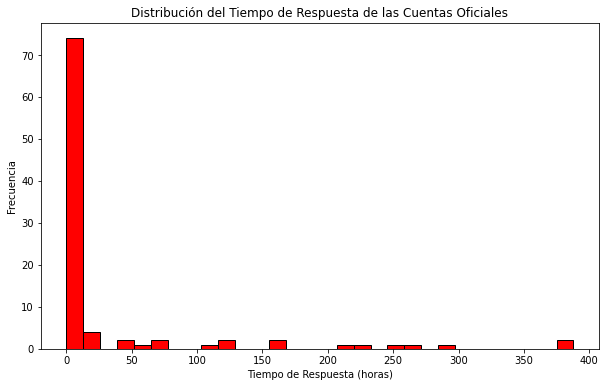

In [26]:
import matplotlib.pyplot as plt

# Crear el histograma del tiempo de respuesta utilizando matplotlib
plt.figure(figsize=(10, 6))

# Convertir el tiempo de respuesta a horas
response_times_in_hours = response_analysis['Response_Time'].dt.total_seconds() / 3600

# Crear el histograma
plt.hist(response_times_in_hours, bins=30, color='red', edgecolor='black')

# Etiquetas y título
plt.xlabel('Tiempo de Respuesta (horas)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tiempo de Respuesta de las Cuentas Oficiales')

# Mostrar el gráfico
plt.show()

In [27]:
# Lista de stopwords personalizada
custom_stopwords = set(stopwords.words('spanish'))
custom_stopwords.update(['día','livedataifx', 'hoy', 'deber', "mostrar","hilo","hacer", "poder","favor", "privado", "caso", "mensaje", "solución", 'davivienda', 'dia', 'respuesta', 'respondiendo', 'responder', 'respondido', 'gracias', 'hola', 'buenos', 'buenas', 'tardes'])

# Función para tokenizar el texto
def tokenize_text(text):
    return word_tokenize(text)

# Función para eliminar stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in custom_stopwords and word.isalpha()]

# Función para eliminar palabras cortas
def remove_short_words(tokens):
    return [word for word in tokens if len(word) > 2]

# Función para lematizar los tokens
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.text if token.pos_ == 'PROPN' else token.lemma_ for token in doc]

data['tokenized_text'] = data['Embedded_text_modified'].apply(tokenize_text)
data['cleaned_text'] = data['tokenized_text'].apply(remove_stopwords)
data['cleaned_text'] = data['cleaned_text'].apply(remove_short_words)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_tokens)
data['final_cleaned_text'] = data['lemmatized_text'].apply(remove_stopwords)
data['cleaned_text_str'] = data['final_cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [28]:
data[['UserName','Timestamp', 'Embedded_text_modified', 'lemmatized_text','cleaned_text_str']].head(2)

,UserName,Timestamp,Embedded_text_modified,lemmatized_text,cleaned_text_str
0,@alangebaek,2021-12-01 20:43:12+00:00,la confianza se afectó el indicador de confianza davivienda tuvo una leve caída en noviembre rompiendo una tendencia de cinco meses de mejoras el indicador se deterioró especialmente en la última semana del mes asociado al aumento en la tasa de cambio,"[confianza, afectar, indicador, confianza, leve, caída, noviembre, romper, tendencia, cinco, mes, mejor, indicador, deteriorar, especialmente, último, semana, mes, asociado, aumento, tasa, cambio]",confianza afectar indicador confianza leve caída noviembre romper tendencia cinco mes mejor indicador deteriorar especialmente último semana mes asociado aumento tasa cambio
1,@plaza_futura,2021-12-01 21:18:10+00:00,buscamos la accesibilidad y mejor atención en tus trámites bancarios es por ello que encuentras en nuestra plaza los siguientes bancos para tu preferencia banco cuscatlán banco fedecrédito davivienda bancoagrícola banco promerica,"[buscar, accesibilidad, mejor, atención, trámite, bancario, él, encuentras, plazar, siguiente, banco, preferencia, banco, cuscatlán, banco, fedecrédito, bancoagrícola, banco, promerico]",buscar accesibilidad mejor atención trámite bancario encuentras plazar siguiente banco preferencia banco cuscatlán banco fedecrédito bancoagrícola banco promerico


## 3. WordClouds o Nubes de Palabras

In [29]:
!pip install --upgrade pip
!pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


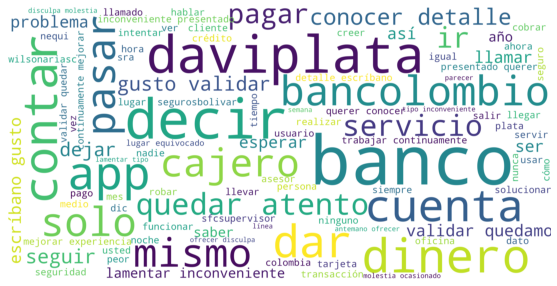

In [30]:
# Crear el wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar el texto limpio
word_cloud_text = ''.join(data.cleaned_text_str)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, 
                      max_font_size=100,
                      max_words=100,
                      scale=10,
                      background_color='white').generate(word_cloud_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

*Word Cloud: Cuentas Oficiales vs. Usuarios*

En este ejercicio, se busca generar una nube de palabras a partir de los tweets de usuarios identificados como canal oficial de Davivienda: '@daviplata', '@davicorredores', '@davivienda' y '@daviescucha'.

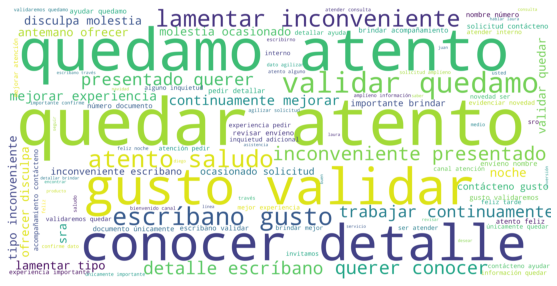

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar los datos
filtered_data = data[data['UserName'].isin(['@daviplata', '@davicorredores', '@davivienda', '@daviescucha'])]

# Concatenar el texto limpio
word_cloud_text = ' '.join(filtered_data.cleaned_text_str)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                      max_words=100,
                      scale=10,
                      background_color='white').generate(word_cloud_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se plantea el mismo ejercicio, esta vez excluyendo los mensajes hechos por las cuentas oficiales.

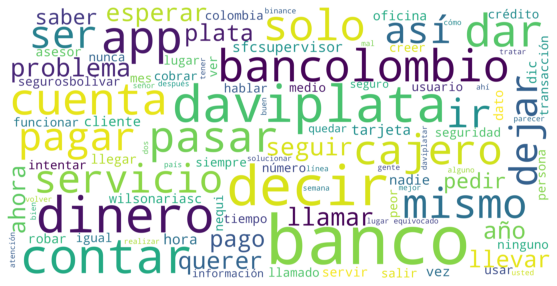

Número total de tweets: 1535


In [32]:
filtered_data = data[~data['UserName'].isin(['@daviplata', '@davicorredores', '@davivienda', '@daviescucha'])]

word_cloud_text = ''.join(filtered_data.cleaned_text_str)
wordcloud = WordCloud(width=800, height=400, 
                      max_font_size=100,
                      max_words=100,
                      scale=10,
                      background_color='white').generate(word_cloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print(f'Número total de tweets: {len(filtered_data)}')  

## Matriz termino-documento - Document-Term Matrix

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from collections import Counter

In [34]:
vec = CountVectorizer()
X = vec.fit_transform(data.cleaned_text_str)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df.head()

,aaaah,aabenedetti,abierto,abogado,abogados,abonado,abonarl,abono,about,abril,...,ésto,ético,éxito,índice,índizar,ís,últimamente,último,únicamente,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
all_tweets_text = ' '.join(data.cleaned_text_str)
tokenized_words = nltk.word_tokenize(all_tweets_text)
word_freq = Counter(tokenized_words)

In [36]:
# PALABRAS MÁS FRECUENTES
word_freq.most_common(30)

[('banco', 237),
 ('atento', 224),
 ('daviplata', 147),
 ('dinero', 145),
 ('quedar', 139),
 ('contar', 128),
 ('decir', 125),
 ('app', 113),
 ('servicio', 107),
 ('wilsonariasc', 106),
 ('querer', 103),
 ('pasar', 99),
 ('cuenta', 98),
 ('bancolombio', 97),
 ('validar', 95),
 ('gusto', 95),
 ('dar', 94),
 ('inconveniente', 91),
 ('sfcsupervisor', 88),
 ('conocer', 84),
 ('problema', 84),
 ('quedamo', 83),
 ('seguir', 82),
 ('lamentar', 82),
 ('atención', 80),
 ('solo', 79),
 ('cliente', 79),
 ('cajero', 78),
 ('mismo', 78),
 ('ir', 75)]

In [37]:
def top_k_ngrams(word_tokens, n, k):
    n_gram_list = list(ngrams(word_tokens, n))
    n_gram_strings = [' '.join(gram) for gram in n_gram_list]
    n_gram_counter = Counter(n_gram_strings)

    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

Nuevamente dividimos la data en dos, de acuerdo con los usuarios de cuentas oficiales del banco vs. los usuarios

In [38]:
# CUENTAS DE DAVIVIENDA

filtered_data = data[data['UserName'].isin(['@daviplata', '@davicorredores', '@davivienda', '@daviescucha'])]

all_tweets_text = ' '.join(filtered_data.cleaned_text_str)
tokenized_words = nltk.word_tokenize(all_tweets_text)
word_freq = Counter(tokenized_words)

word_tokens = nltk.word_tokenize(all_tweets_text) 
top_k_ngrams(word_tokens, 3, 10)

[('validar quedamo atento', 56), ('lamentar inconveniente presentado', 50), ('quedar atento saludo', 49), ('querer conocer detalle', 45), ('conocer detalle escríbano', 44), ('detalle escríbano gusto', 44), ('inconveniente presentado querer', 40), ('presentado querer conocer', 39), ('escríbano gusto validar', 39), ('trabajar continuamente mejorar', 37)]


In [39]:
# CUENTAS DE USUARIOS/CLIENTES DEL BANCO

filtered_data = data[~data['UserName'].isin(['@daviplata', '@davicorredores', '@davivienda', '@daviescucha'])]

all_tweets_text = ' '.join(filtered_data.cleaned_text_str)
tokenized_words = nltk.word_tokenize(all_tweets_text)
word_freq = Counter(tokenized_words)

word_tokens = nltk.word_tokenize(all_tweets_text) 
top_k_ngrams(word_tokens, 3, 10)

[('gran concierto navidad', 8), ('dinero lugar equivocado', 7), ('conocido primero mano', 6), ('primero mano funcionario', 6), ('mano funcionario aparente', 6), ('funcionario aparente falsificación', 6), ('aparente falsificación firma', 6), ('falsificación firma cambiar', 6), ('firma cambiar cláusula', 6), ('cambiar cláusula contrato', 6)]


## 6. Latent Dirichlet Allocation - Modelo no supervisado de Tópicos.

El topic modeling es una técnica no supervisada de NLP, capaz de detectar y extraer de manera automática relaciones semánticas latentes de grandes volúmenes de información.

Estas relaciones son los llamados tópicos, que son un conjunto de palabras que suelen aparecer juntas en los mismos contextos y nos permiten observar relaciones que seríamos incapaces de observar a simple vista.

In [40]:
# Verificación de instalaciones
import langgraph
import langchain_openai
import langchain_core
import langchain_community
import google.generativeai
import time
import google.generativeai as genai
import os
from dotenv import load_dotenv
from google.generativeai import GenerationConfig, GenerativeModel


In [41]:
load_dotenv()

# Usar la clave API de forma segura
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)


In [42]:
# Configurar el modelo generativo
model = GenerativeModel("gemini-1.5-flash")

# Generation Config
config = GenerationConfig(
    max_output_tokens=1048,
    temperature=0.1,
    top_p=1,
    top_k=20
)

In [46]:
role_eng = """Extract key keywords or phrases from the following text and perform sentiment analysis: \n"""
prompt_eng = """ You must:
      - **Keyword**: Identify and list the most important keywords or key phrases in the text.
      These keywords should capture the main topics, concepts, or subjects discussed in the text, and be explicitly mentioned.
      Maximum amount of keywords are 3. One keyword maximum words is 3. Avoid the usage of stopwords.
      - **Keywords_parsed**: Standardize keywords identified previously. Use same as previous keywords. Give nouns in singular and verbs in infinitive.
      - **Secondary_terms**: If there are subtopics or secondary themes mentioned in the text, list them as well.
      Ensure that the extracted keywords accurately represent the content's context.
      No more than 3 keywords. Avoid the usage of stopwords. Verbs must be in infinitive and nouns in singular. In case no keywords are found answer None.
      - **BankingProduct**: Identify the banking product the text refers to. Avoid the usage of stopwords. In case you do not find a banking product answer None.
      - **BankingTransaction**: Identify the banking transaction OR ACTION text refers to. In case you do not find one answer None.
      - **SpecificTerm**: Identify any procedure, process or specific term text refers to. Answer no more than 3 words. If not found answer None.
      - **Acronym**: Identify any acronym or abbreviation text refers to. Answer no more than 3 words. If not found answer None.
      - **Intention**: Identify text intention or meaning. Be short, just in 4 words or less.
      - **Sentiment**: Perform sentiment analysis on the text. Classify the sentiment as Positive, Negative, or Neutral.

      Answer in Spanish in the following format:

          {
              "Keyword": ["",..],
              "Keywords_parsed": ["",..],
              "secondary_terms": "",
              "BankingProduct": "",
              "BankingTransaction": "",
              "Acronym": "",
              "Intention": "",
              "Sentiment": ""
          }

      Do not respond with your own suggestions or recommendations or feedback. Answers and terms must be in Spanish. Give nouns in singular and verbs in infinitive.
      """


In [43]:
import time
import json
import re

gemini_true = False

if gemini_true:

    role = role_eng
    prompt = prompt_eng

    responses = []
    responses_parsed = []

    for index, row in data.iterrows():
        text = row['Embedded_text_modified']
        prompt = role_eng + text + prompt_eng  # Combinar el rol y el texto

        response = model.generate_content(prompt, generation_config=config)
        responses.append(response.text)

        # Guardar la respuesta en el DataFrame
        data.at[index, 'response'] = response.text

        # Realizar una pausa cada 10 filas para evitar sobrecargar el modelo o la API
        if index % 10 == 0:
            time.sleep(2)

        # Imprimir el estado actual cada 10 filas
        if index % 10 == 0:
            print(f"Procesadas {index + 1} filas de {len(data)}")

    # Función para limpiar y convertir JSON string a diccionario
    def clean_and_convert(json_str):
        try:
            # Eliminar caracteres no deseados y espacios en blanco
            cleaned_str = re.sub(r'\\n', '', json_str)
            cleaned_str = re.sub(r'```json', '', cleaned_str)
            cleaned_str = re.sub(r'```', '', cleaned_str)
            cleaned_str = cleaned_str.strip()

            # Convertir a diccionario
            return json.loads(cleaned_str)
        except (json.JSONDecodeError, TypeError) as e:
            print(f"Error decoding JSON: {e}")  # Depuración
            return None

    # Limpiar y convertir cada fila de la columna 'response'
    data['cleaned_response'] = data['response'].apply(clean_and_convert)

    # Expandir las columnas de 'cleaned_response' en el DataFrame original
    expanded_columns = data['cleaned_response'].apply(pd.Series)

    # Unir las columnas expandidas al DataFrame original
    data_enr = pd.concat([data, expanded_columns], axis=1)

        
else: 
    filename = 'davivienda_tweets_procesados_gemini.csv'
    data_enr = pd.read_csv(filename)

## 7. Interpretación de Resultados y conclusiones generales.

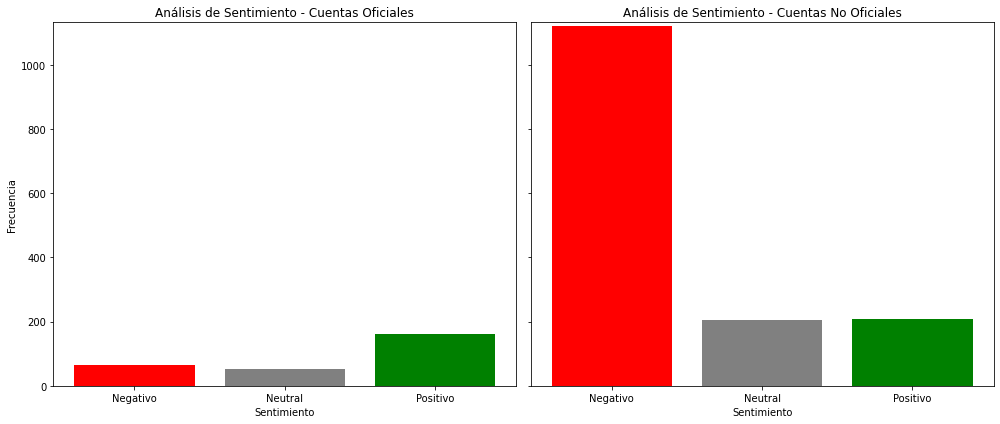

In [55]:
# Diccionario de mapeo para homologar los valores de Sentiment
sentiment_mapping = {
    'Negative': 'Negativo',
    'Neutral': 'Neutral',
    'Positive': 'Positivo'
}

data_enr['Sentiment'] = data_enr['Sentiment'].replace(sentiment_mapping)

# Filtrar los datos

# Cuentas oficiales
official_accounts = ['@daviplata', '@davicorredores', '@davivienda', '@daviescucha']
filtered_data_official = data_enr[data_enr['UserName'].isin(official_accounts)]

# Cuentas no oficiales
filtered_data_non_official = data_enr[~data_enr['UserName'].isin(official_accounts)]

# Contar los valores de Sentiment para cuentas oficiales y no oficiales
sentiment_counts_official = filtered_data_official['Sentiment'].value_counts().reindex(sentiment_mapping.values(), fill_value=0)
sentiment_counts_non_official = filtered_data_non_official['Sentiment'].value_counts().reindex(sentiment_mapping.values(), fill_value=0)

# Crear el gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para cuentas oficiales
ax[0].bar(sentiment_counts_official.index, sentiment_counts_official.values, color=['red', 'grey', 'green'])
ax[0].set_title('Análisis de Sentimiento - Cuentas Oficiales')
ax[0].set_xlabel('Sentimiento')
ax[0].set_ylabel('Frecuencia')
ax[0].set_ylim(0, max(sentiment_counts_official.max(), sentiment_counts_non_official.max()) + 10)

# Gráfico para cuentas no oficiales
ax[1].bar(sentiment_counts_non_official.index, sentiment_counts_non_official.values, color=['red', 'grey', 'green'])
ax[1].set_title('Análisis de Sentimiento - Cuentas No Oficiales')
ax[1].set_xlabel('Sentimiento')

plt.tight_layout()
plt.show()

In [50]:
data_enr[['UserName', 'Timestamp', 'Embedded_text_modified', 'Keyword', 'Keywords_parsed', 'secondary_terms',
       'BankingProduct', 'BankingTransaction', 'SpecificTerm', 'Acronym',
       'Intention', 'Sentiment']].tail(2)

,UserName,Timestamp,Embedded_text_modified,Keyword,Keywords_parsed,secondary_terms,BankingProduct,BankingTransaction,SpecificTerm,Acronym,Intention,Sentiment
1809,@davivienda,2021-12-22 11:45:13+00:00,en respuesta a @diegoruix buenos días sr diego evidenciamos que su novedad fue atendida por mensaje interno estamos atentos para ayudarle en caso de alguna inquietud adicional saludos,"['novedad', 'atender', 'mensaje']","['novedad', 'atender', 'mensaje']",inquietud adicional,NaN,NaN,mensaje interno,NaN,Confirmar atención novedad,Positivo
1810,@davivienda,2021-12-22 00:36:57+00:00,en respuesta a @diegoruix buenas tardes sr diego de antemano ofrecemos disculpas por las molestias ocasionadas para ayudarle con su solicitud por favor contáctenos por mensaje privado y con gusto lo validaremos quedamos atentos,"['disculpas', 'molestias', 'contacto']","['disculpa', 'molestia', 'contactar']",solicitud,NaN,NaN,mensaje privado,NaN,Ofrecer disculpas y ayuda,Positivo


Se realiza análisis sobre los tweets de usuarios de cuentas no oficiales y que presentan un sentimiento negativo.

In [61]:
# Filtrar los datos para usuarios no oficiales
official_accounts = ['@daviplata', '@davicorredores', '@davivienda', '@daviescucha']
non_official_data = data_enr[~data_enr['UserName'].isin(official_accounts)]

# Filtrar los datos para sentimiento 'Negativo'
negative_sentiment_data = non_official_data[non_official_data['Sentiment'] == 'Negativo']

In [62]:
# Contar las ocurrencias en las columnas de interés
banking_product_counts = negative_sentiment_data['BankingProduct'].value_counts()
banking_transaction_counts = negative_sentiment_data['BankingTransaction'].value_counts()
specific_term_counts = negative_sentiment_data['SpecificTerm'].value_counts()
acronym_counts = negative_sentiment_data['Acronym'].value_counts()
intention_counts = negative_sentiment_data['Intention'].value_counts()

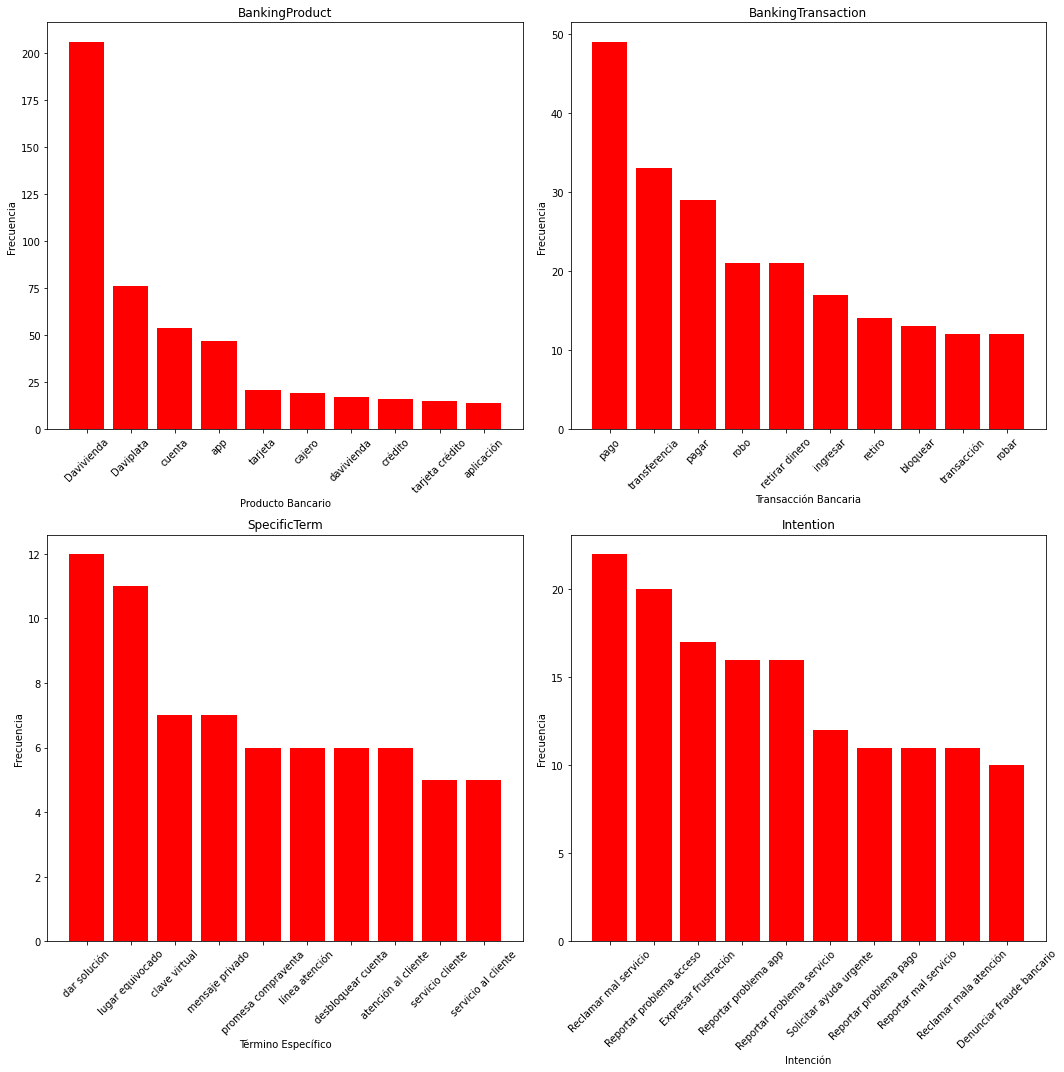

In [66]:
import matplotlib.pyplot as plt

# Seleccionar los 10 términos más frecuentes en cada categoría
top_n = 10
banking_product_counts_top = banking_product_counts.nlargest(top_n)
banking_transaction_counts_top = banking_transaction_counts.nlargest(top_n)
specific_term_counts_top = specific_term_counts.nlargest(top_n)
acronym_counts_top = acronym_counts.nlargest(top_n)
intention_counts_top = intention_counts.nlargest(top_n)

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Gráfico para BankingProduct
axs[0, 0].bar(banking_product_counts_top.index, banking_product_counts_top.values, color='red')
axs[0, 0].set_title('BankingProduct')
axs[0, 0].set_xlabel('Producto Bancario')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].tick_params(axis='x', rotation=45)

# Gráfico para BankingTransaction
axs[0, 1].bar(banking_transaction_counts_top.index, banking_transaction_counts_top.values, color='red')
axs[0, 1].set_title('BankingTransaction')
axs[0, 1].set_xlabel('Transacción Bancaria')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].tick_params(axis='x', rotation=45)

# Gráfico para SpecificTerm
axs[1, 0].bar(specific_term_counts_top.index, specific_term_counts_top.values, color='red')
axs[1, 0].set_title('SpecificTerm')
axs[1, 0].set_xlabel('Término Específico')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].tick_params(axis='x', rotation=45)

# Gráfico para Intention
axs[1, 1].bar(intention_counts_top.index, intention_counts_top.values, color='red')
axs[1, 1].set_title('Intention')
axs[1, 1].set_xlabel('Intención')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajustar el layout
plt.tight_layout()
plt.show()

En términos de transacciones bancarias, aquellas relacionadas con pagos, transferencias y retiros son las que más frustación generan a los usuarios. Las áreas más problemáticas incluyen la funcionalidad de la aplicación, la seguridad de las transacciones y la calidad del servicio al cliente

### CONCLUSIONES GENERALES:


Se evidencia que en la mayoría de tweets corresponden a quejas y reclamos por fallas en el servicio al cliente o directamente relacionados con los canales del banco. Si bien las cuentas oficiales son rápidas en responder (Tiempo aproximado de una hora), muchas de las interacciones se terminan desarrollando a través de mensaje privado (buscado por los mismos canales oficiales) por lo que no se cuenta con información respecto a la resolución de los mismos. Sería ideal tener acceso a estas conversaciones y evaluar el comportamiento de los usuarios una vez interactuan con una persona. Así mismo se podría evaluar la capacidad de resolución que tienen las cuentas. 